## Plotting characteristics of authors who left publishing versus when they did not

This is main plot 1.

------

In [1]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from matplotlib.patches import Rectangle

# Importing relevant packages

import os
import numpy as np

In [2]:
# Path to where we will save our processed files
INDIR = "../../plot_data/1/"
# Path to where we will save our processed files
OUTDIR = "../../plots/"

In [3]:
# Reading relevant files

# Reading authors in our new filtered sample
#df_main = pd.read_csv(INDIR+"RW_authors_w_confounders_filteredSample_postNHB_BedoorsCorrections_Augmented.csv")
df_main = pd.read_csv(INDIR+"filtered_sample_plot1.csv")

# Only extracting those with single retraction
df_main = df_main[df_main['nRetracted']==1]

# Just because ..
df_main['Attrition'] = df_main['AttritedClass']

df_main.columns.tolist()

['Record ID',
 'nRetracted',
 'MAGPID',
 'MAGAID',
 'MAGFieldName',
 'GenderizeGender',
 'AcademicAgeAtRetraction',
 'MAGRetractionYearAffRankOrdinal',
 'ReasonPropagatedMajorityOfMajority',
 'NumAuthorsInRetractedPaper',
 'MAGAuthorOrderCategorical',
 'RetractionYear',
 'DemiDecade',
 'MAGJournalType',
 'MAGCumPapersAtRetraction',
 'MAGCumCitationsAtRetraction',
 'MAGCumCollaboratorsAtRetraction',
 'SJRQuartileRetractedPaperYear',
 'SJRScoreRetractedPaperYear',
 'AttritedClass',
 'Attrition',
 'AttritionNew',
 'YearsActiveNew',
 'YearOfAttrition']

In [5]:
# Computing Years Active 
df_main['YearsActive'] = df_main['YearOfAttrition']-df_main['RetractionYear']

# When year of attrition == -1, we do not know the years active, so we won't plot them
df_main.loc[df_main['YearOfAttrition'] == -1, 'YearsActive'] = np.nan

df_main.head(1)

,Record ID,nRetracted,MAGPID,MAGAID,MAGFieldName,GenderizeGender,AcademicAgeAtRetraction,MAGRetractionYearAffRankOrdinal,ReasonPropagatedMajorityOfMajority,NumAuthorsInRetractedPaper,...,MAGCumCitationsAtRetraction,MAGCumCollaboratorsAtRetraction,SJRQuartileRetractedPaperYear,SJRScoreRetractedPaperYear,AttritedClass,Attrition,AttritionNew,YearsActiveNew,YearOfAttrition,YearsActive
0,0d2625cc8c9515a19bd1e6fc5afa3e3922ac5b12c11c42...,1,4f7713a5b2b785648e9b4af114f94ac7b527149ff7ecaf...,86dd71f784008b7586497c364bc7f018559da12d2ab46c...,biology,male,21.0,89.0,mistake,5.0,...,2441.0,266.0,NaN,NaN,0,0,0,-19.0,-1.0,NaN


In [6]:
# Checking number of NaNs
df_main[['MAGAID','YearsActive']].drop_duplicates()['YearsActive'].value_counts(dropna=False)

YearsActive
 NaN     9354
 0.0     1516
-1.0      884
-2.0      426
 1.0      352
         ... 
-59.0       1
 12.0       1
-65.0       1
-64.0       1
-60.0       1
Name: count, Length: 83, dtype: int64

In [7]:
# Checking how many attrited
df_main[['MAGAID','Attrition']].drop_duplicates()['Attrition'].value_counts()

Attrition
 0    10342
 1     2400
-1     1837
Name: count, dtype: int64

In [8]:
df_main.columns

Index(['Record ID', 'nRetracted', 'MAGPID', 'MAGAID', 'MAGFieldName',
       'GenderizeGender', 'AcademicAgeAtRetraction',
       'MAGRetractionYearAffRankOrdinal', 'ReasonPropagatedMajorityOfMajority',
       'NumAuthorsInRetractedPaper', 'MAGAuthorOrderCategorical',
       'RetractionYear', 'DemiDecade', 'MAGJournalType',
       'MAGCumPapersAtRetraction', 'MAGCumCitationsAtRetraction',
       'MAGCumCollaboratorsAtRetraction', 'SJRQuartileRetractedPaperYear',
       'SJRScoreRetractedPaperYear', 'AttritedClass', 'Attrition',
       'AttritionNew', 'YearsActiveNew', 'YearOfAttrition', 'YearsActive'],
      dtype='object')

In [9]:
# Renaming columns
df_main = df_main.rename(columns={'RetractedPaperMAGPID':'MAGPID',
                                 'FieldName':'MAGFieldName',
                                 'AcademicAge': 'AcademicAgeAtRetraction',
                                 'AffRank': 'MAGRetractionYearAffRank',
                                 'NumAuthorsInRetractedPaperRW':'NumAuthorsInRetractedPaper',
                                 'cumPapers':'MAGCumPapersAtRetraction',
                                 'cumCitations':'MAGCumCitationsAtRetraction',
                                 'cumCollaborators':'MAGCumCollaboratorsAtRetraction',
                                 'SJR':'SJRScoreRetractedPaperYear',
                                 'SJR Best Quartile':'SJRQuartileRetractedPaperYear'})

# I did this as I did not want to replace and rewrite the code
df_main['YearsActiveNew'] = df_main['YearsActive']
# Same here..
df_main['AttritionNew'] = df_main['Attrition']

# Only extracting relevant columns
relevant_columns = ['Record ID', 'MAGPID', 'MAGAID', 'MAGFieldName', 
                   'GenderizeGender', 'AcademicAgeAtRetraction', 'MAGRetractionYearAffRankOrdinal',
                   'ReasonPropagatedMajorityOfMajority', 'NumAuthorsInRetractedPaper', 
                   'MAGAuthorOrderCategorical', 'RetractionYear', 'DemiDecade',
                   'MAGJournalType', 'MAGCumPapersAtRetraction', 'MAGCumCitationsAtRetraction',
                   'MAGCumCollaboratorsAtRetraction', 'SJRQuartileRetractedPaperYear','SJRScoreRetractedPaperYear',
                   'Attrition','AttritionNew', 'YearsActiveNew',
                   'YearOfAttrition']

df_relevant = df_main[relevant_columns].drop_duplicates()

df_relevant_w_lastactivity = df_relevant

# 0 means non-attrited, 1 means attrited, -1 means attrited due to something else
df_relevant[['MAGAID','AttritionNew']].drop_duplicates()['AttritionNew'].value_counts() 

AttritionNew
 0    10342
 1     2400
-1     1837
Name: count, dtype: int64

In [10]:
# Some Pre-processing

# Processing fields so that we only plot those with >= 5 % population

# Classifying fields with < 5% as other stem and non-stem
other_stem_fields = ['materials science', 'computer science',
                'engineering', 'mathematics', 'psychology',
                'economics', 'environmental science', 'geography','sociology',
                'political science', 'geology']


non_stem_fields = ['philosophy','business',
                  'history','art']

df_relevant_w_lastactivity['MAGFieldName'] = df_relevant_w_lastactivity['MAGFieldName']\
                                                   .replace(dict.fromkeys(other_stem_fields, 'other STEM fields'))\
                                                    .replace(dict.fromkeys(non_stem_fields,'non-STEM fields'))


# Preprocessing affiliation ranks
df_relevant_w_lastactivity['MAGRetractionYearAffRank'] = df_relevant_w_lastactivity['MAGRetractionYearAffRankOrdinal']\
                                                .replace([rank for rank in range(101)], '1-100')\
                                                .replace([rank for rank in range(101,501)], 
                                                         '101-500')\
                                                .replace([rank for rank in range(501,1001)], 
                                                         '501-1000')\
                                                .replace(1500, '>1000')

# Preprocessing Journal Quartile
df_relevant_w_lastactivity['SJRQuartileRetractedPaperYear'] = df_relevant_w_lastactivity['SJRQuartileRetractedPaperYear']\
                                        .replace({1.0:'Q1',
                                                 2.0:'Q2',
                                                 3.0:'Q3',
                                                 4.0:'Q4'})\
                                        .fillna('NA')


df_attrited = df_relevant_w_lastactivity[df_relevant_w_lastactivity['AttritionNew'] == 1]

df_nonattrited = df_relevant_w_lastactivity[df_relevant_w_lastactivity['AttritionNew'] == 0]


df_relevant_w_lastactivity


,Record ID,MAGPID,MAGAID,MAGFieldName,GenderizeGender,AcademicAgeAtRetraction,MAGRetractionYearAffRankOrdinal,ReasonPropagatedMajorityOfMajority,NumAuthorsInRetractedPaper,MAGAuthorOrderCategorical,...,MAGCumPapersAtRetraction,MAGCumCitationsAtRetraction,MAGCumCollaboratorsAtRetraction,SJRQuartileRetractedPaperYear,SJRScoreRetractedPaperYear,Attrition,AttritionNew,YearsActiveNew,YearOfAttrition,MAGRetractionYearAffRank
0,0d2625cc8c9515a19bd1e6fc5afa3e3922ac5b12c11c42...,4f7713a5b2b785648e9b4af114f94ac7b527149ff7ecaf...,86dd71f784008b7586497c364bc7f018559da12d2ab46c...,biology,male,21.0,89.0,mistake,5.0,First or Last or Only Author,...,109,2441.0,266.0,NA,NaN,0,0,NaN,-1.0,1-100
5,ed4f9ab58560a9b791e8ac36ccbba1126c8f6dd5010d18...,8ace054dc86a892538cf8c6f95f101d15491ce96790d69...,1673516d195dbf3d0c5de4bb39e1963b85206a77806c6c...,biology,male,17.0,175.0,misconduct,5.0,First or Last or Only Author,...,109,1478.0,246.0,NA,NaN,0,0,NaN,-1.0,101-500
8,d22dd4c1433727c0a56db0a381af83201620dbeff2ac59...,4fcd124497e630ab14e0968fcf3ce867c3948dbd86f217...,ca90f1b981e520780bc5622ebd072016b612699bdf7f50...,biology,male,20.0,1500.0,mistake,10.0,Middle Author,...,253,1966.0,338.0,NA,NaN,0,0,NaN,-1.0,>1000
9,c83f8ce24dcd4c2b07e79c60dbdb70595a586652efcf3d...,2d44b27fab960dfba3c946cffdbb2e823f05ce2b9fd9d0...,1cef270148c05f6f7fdb54fcfe9845ab1ac0898b2760e8...,biology,male,7.0,28.0,mistake,3.0,First or Last or Only Author,...,29,574.0,22.0,NA,NaN,0,0,10.0,2008.0,1-100
11,4e893a5e600e9e6d353b97ebf9fe435808664c11a539ba...,85b4433a0b028c1b2bdaf36196e4b31092f32c277c7ca1...,4a0c7c715cf686e8e5df9434c4ef37ccdd6ce4ca490f3b...,biology,male,25.0,1.0,misconduct,4.0,First or Last or Only Author,...,252,5008.0,249.0,NA,NaN,0,0,NaN,-1.0,1-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28857,4d0751953578aa574c073abf82aa9cea5ec14e2f3942e2...,98dcda28d1c10dbc56851db3138b861265e4987a1e63bf...,e08ed6440e37c965f0138b1b1ec17274229f5e5c867f92...,other STEM fields,male,3.0,1500.0,mistake,4.0,Middle Author,...,2,9.0,4.0,Q1,0.785,1,1,-1.0,2012.0,>1000
28858,76ee8ca009e6a6c65f594cb7eb667230449b724fef1573...,20fe875aef29391dae418aefc38be21cfde45405aeb9c9...,f6ae653b2cdd3fe27c5eb713dd5a15db1f3853bc3d8546...,other STEM fields,male,0.0,450.0,misconduct,4.0,Middle Author,...,1,1.0,3.0,NA,NaN,1,1,0.0,2012.0,101-500
28859,18ecbac91f2c707b4c197b403ca381cf3f703d7171314f...,3eedcc612725ab8741d158caeccadf2f69b8a2b8757a2b...,c80980806b1f21de9c6e32800685a86c753b59b7590897...,other STEM fields,male,1.0,1500.0,misconduct,3.0,Middle Author,...,1,1.0,2.0,Q1,1.772,0,0,NaN,-1.0,>1000
28860,c2c358e9dd15de84331652b848b7ad410ef3f0f8a06a31...,e6162360c5bdd8c3da730ad4c23fb4ec9f500459cb3724...,768dae6d35e90d1a015bdc4087331d6e370bbd6378be5a...,other STEM fields,male,1.0,1500.0,plagiarism,3.0,First or Last or Only Author,...,2,0.0,5.0,NA,NaN,1,1,0.0,2014.0,>1000


# Author related features

## Distribution of authors' last activity

In [11]:
# Code for creating the bar plot

def create_attrition_barplot(axesi, ticksize, labelsize, attrited_color,
                        nonattrited_color, other_color):
    
    # Only extracting relevant dataframe
    
    # Computing the groups
    df_grouped_values_treatment = df_relevant_w_lastactivity[['MAGAID','YearsActiveNew']]\
                .drop_duplicates()\
                .groupby('YearsActiveNew')['MAGAID'].nunique().reset_index()
    
    # Computing number of authors in our set
    num_authors = df_relevant_w_lastactivity[~df_relevant_w_lastactivity.YearsActiveNew.isna()]\
                            .MAGAID.nunique()
    
    # Getting Percentage of retracted scientists
    df_grouped_values_treatment['Percentage of Retracted Scientists'] = \
        round(df_grouped_values_treatment['MAGAID']*100.0/num_authors,10)
    
    print("Percentage outside of range",df_grouped_values_treatment[df_grouped_values_treatment['YearsActiveNew'].lt(-10)
                                     | df_grouped_values_treatment['YearsActiveNew'].gt(10)]
         ['Percentage of Retracted Scientists'].sum())
    
    # Filtering to only include authors within certain years range
    df_grouped_values_treatment = df_grouped_values_treatment[\
                                df_grouped_values_treatment['Percentage of Retracted Scientists'].gt(0) & 
                                df_grouped_values_treatment['YearsActiveNew'].ge(-10) & 
                                df_grouped_values_treatment['YearsActiveNew'].le(10)]
    
    df_grouped_values_treatment['YearsActiveNew'] = df_grouped_values_treatment['YearsActiveNew'].astype(int)

    # Setting colors for bars
    
    colors = [other_color if (x < -1) else (nonattrited_color if (x > 0) else attrited_color) \
                  for x in df_grouped_values_treatment['YearsActiveNew'].tolist()]


    barplot_treatment = sns.barplot(data=df_grouped_values_treatment, ax=axesi,
                            x='YearsActiveNew', y="Percentage of Retracted Scientists", palette=colors,
                                   saturation=1)

    barplot_treatment.tick_params(labelsize=ticksize)

    for item in barplot_treatment.get_xticklabels():
        item.set_rotation(60)

    for patch in barplot_treatment.patches:
        
        value = patch.get_height()
        if(value >= 1.5):
            barplot_treatment.annotate(format(value, '.1f'), 
                           (patch.get_x() + patch.get_width() / 2., patch.get_height()+1), 
                           ha = 'center', va = 'center', fontsize=labelsize, weight='regular',
                           xytext = (0, 9), 
                           textcoords = 'offset points')

    barplot_treatment.set_xlabel('year of last publication since retraction (year 0)', 
                          fontsize=labelsize)

    barplot_treatment.set_ylabel('% of retracted \nauthors who left', fontsize=labelsize)
    
    barplot_treatment.axvline(10, ymax=0.80, color='black', lw=2, linestyle='--')
    
    barplot_treatment.set_ylim(0,35)
    
    sns.despine()

In [12]:
df_nonattrited['MAGAID'].nunique()

10342

In [13]:
df_attrited['MAGAID'].nunique()

2400

## Distribution of authors' disciplines

In [14]:
def create_discipline_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    
    field_of_interest = 'MAGFieldName'
    # Extracting number of authors and their percentage in each discipline
    # For attrited
    num_authors_discipline_attrited = df_attrited[['MAGAID','MAGFieldName']]\
                                    .drop_duplicates().shape[0]

    df_attrited_discipline_percent = (df_attrited[['MAGAID','MAGFieldName']]\
        .drop_duplicates().MAGFieldName.value_counts()*100/num_authors_discipline_attrited)\
        .reset_index().rename(columns={'index':'MAGFieldName','count':'Percentage'})
    # For nonattrited
    num_authors_discipline_nonattrited = df_nonattrited[['MAGAID','MAGFieldName']]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_discipline_percent = (df_nonattrited[['MAGAID','MAGFieldName']]\
            .drop_duplicates().MAGFieldName.value_counts()*100/num_authors_discipline_nonattrited)\
            .reset_index().rename(columns={'index':'MAGFieldName','count':'Percentage'})
    
    
    # Creating an order
    elements = ['biology','chemistry','medicine','physics', 'other STEM fields', 'non-STEM fields']
    #elements = df_attrited['MAGFieldName'].unique().tolist()
    mapping = {elem: i for i, elem in enumerate(elements)}
    key_attrited = df_attrited_discipline_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_discipline_percent[field_of_interest].map(mapping)
    
    df_attrited_discipline_percent = df_attrited_discipline_percent.iloc[key_attrited.argsort()]
    df_nonattrited_discipline_percent = df_nonattrited_discipline_percent.iloc[key_nonattrited.argsort()]
    
    print(df_attrited_discipline_percent)
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_discipline_percent.MAGFieldName.nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_discipline_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_discipline_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('discipline', fontsize=labelsize)
    axesi.set_xlabel('% authors', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,15,30,45])
    
    axesi.tick_params(labelsize=ticksize)
    
    axesi.set_yticklabels(elements)

    #axesi.set_yticklabels(['biology','chemistry','medicine','physics', 'other STEM\n fields', 'non-STEM\n fields'])
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()
    
    plt.tight_layout()

## Distribution of authors' gender

In [15]:
def create_gender_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'GenderizeGender'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGAID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGAID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('gender', fontsize=labelsize)
    axesi.set_xlabel('% authors', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,20,40,60,80])
    
    axesi.tick_params(labelsize=ticksize)

    axesi.set_yticklabels(df_nonattrited_percent[field_of_interest].tolist())
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()
    
    plt.tight_layout()


## Distribution of authors' order

In [16]:
def create_authororder_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'MAGAuthorOrderCategorical'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGAID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGAID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('author order', fontsize=labelsize)
    axesi.set_xlabel('% authors', fontsize=labelsize)

    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,20,40,60,80])
    
    axesi.tick_params(labelsize=ticksize)
    
    ytick_dict = {'First or Last or Only Author': 'first or last\nauthor',
                 'Middle Author': 'middle\nauthor'}
    
    yticklabels = [ytick_dict.get(item, item) for item in df_nonattrited_percent[field_of_interest].tolist()]
    
    axesi.set_yticklabels(yticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()
    
    plt.tight_layout()

## Distribution of authors' affiliation ranking

In [17]:
def create_affrank_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'MAGRetractionYearAffRank'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGAID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGAID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    # Creating an order
    affranks = ['1-100','101-500','501-1000','>1000']
    mapping = {affrank: i for i, affrank in enumerate(affranks)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('affiliation rank', fontsize=labelsize)
    axesi.set_xlabel('% authors', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,20,40, 60])
    
    axesi.tick_params(labelsize=ticksize)
    
    yticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_yticklabels(yticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()
    
    plt.tight_layout()

## Plotting Continuous: KDE plot

In [18]:
def plotPvalue(ax, x, y, pVal, gap, lw=0.2, c='black'):
    """
    This function will be used to plot the p-values. 
    """
    
    height = max(y[0], y[1])
    
    handles_y0 = height + gap[0]
    handles_y1 = height + gap[1]
    
    ax.hlines(handles_y1, x[0], x[1], color=c, lw=lw)
    ax.vlines(x[0], handles_y0, handles_y1, color=c, lw=lw)
    ax.vlines(x[1], handles_y0, handles_y1, color=c, lw=lw)
    
    stars = '***' if pVal < 0.001 else '**' if pVal < 0.01 else '*' if pVal < 0.05 else f'p={round(pVal, 2)}'
    offset = 0.01 if pVal < 0.05 else 0.04
    
    ax.text((x[0] + x[1])/2, handles_y1, stars, ha='center', color=c)

In [19]:
## Code for plotting continuous values as well as the means and statistical significance test

def create_continuous_plot(field_of_interest, xlabel, axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color, remove_outliers=True, xlim=False,
                          handle_gaps=[0,0]):
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    df_relevant_attrited = df_attrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates()
    
    df_relevant_attrited['AuthorType'] = 'attrited'
    
    # For nonattrited
    df_relevant_nonattrited = df_nonattrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates()
    
    df_relevant_nonattrited['AuthorType'] = 'nonattrited'
    
    print("Attrited:",df_relevant_attrited.MAGAID.nunique())
    print("NonAttrited:",df_relevant_nonattrited.MAGAID.nunique())
    
    
    # Removing outliers (top 1%)
    
    if(remove_outliers):
    
        df_relevant_attrited = df_relevant_attrited[df_relevant_attrited[field_of_interest].\
                                            le(df_relevant_attrited[field_of_interest].quantile(.99))]

        df_relevant_nonattrited = df_relevant_nonattrited[df_relevant_nonattrited[field_of_interest].\
                                            le(df_relevant_nonattrited[field_of_interest].quantile(.99))]
    
    df_relevant_all = pd.concat([df_relevant_attrited,df_relevant_nonattrited])
    
    
    sns.kdeplot(data=df_relevant_all, x=field_of_interest,
                fill=True, alpha=0.6, linewidth=0, palette=[attrited_color, nonattrited_color],
                ax=axesi, hue='AuthorType', hue_order=['attrited','nonattrited'], cut=0)
    
    # Plotting means
    
    min_ylim, max_ylim = axesi.get_ylim()
    min_xlim, max_xlim = axesi.get_xlim()
    
    print(min_ylim, max_ylim)
    print(min_xlim, max_xlim)
    
    axesi.axvline(df_relevant_attrited[field_of_interest].mean(), 
                  0,0.85, color=attrited_color, 
                  linestyle='dashed', linewidth=1.5)
    
    axesi.axvline(df_relevant_nonattrited[field_of_interest].mean(), 
                  0,0.85,color=nonattrited_color, 
                  linestyle='dashed', linewidth=1.5)
    
    
    # Now we plot p-values
    _, pval = ttest_ind(df_relevant_attrited[field_of_interest], 
                     df_relevant_nonattrited[field_of_interest], equal_var=False)
    
    plotPvalue(axesi, [df_relevant_attrited[field_of_interest].mean(),
                      df_relevant_nonattrited[field_of_interest].mean()], 
                     [max_ylim,max_ylim], pval, handle_gaps, lw=0.1, c='black')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('Author Density', fontsize=labelsize)
    axesi.set_xlabel(xlabel, fontsize=labelsize)
    
    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)
    
    axesi.set_facecolor('white')
    axesi.get_legend().remove()

    if(xlim):
        axesi.set_xlim(xlim[0],xlim[1])
    
    axesi.tick_params(labelsize=ticksize)
    
    # Fixing xticks to remove anything below 0
    
    new_xticks = list(filter(lambda xtick: xtick >=0, axesi.get_xticks()))
    axesi.set_xticks(new_xticks)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)
    

## Plotting Continuous: Boxplots

In [20]:
## Code for plotting continuous values as well as the means and statistical significance test

def create_box_plot(field_of_interest, ylabel, axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color, remove_outliers=True, xlim=False,
                          handle_gaps=[0,0]):
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    df_relevant_attrited = df_attrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates()
    
    # For nonattrited
    df_relevant_nonattrited = df_nonattrited[['MAGAID',field_of_interest]]\
                                    .drop_duplicates()
    
    
    linewidth = 1
    width = 0.20

    bp_attrited = dict(color=attrited_color, linestyle='-', linewidth=linewidth)
    bp_nonattrited = dict(color=nonattrited_color, linestyle='-', linewidth=linewidth)

    # median props
    mp_attrited = dict(linestyle='-', linewidth=linewidth, color=attrited_color)
    mp_nonattrited = dict(linestyle='-', linewidth=linewidth, color=nonattrited_color)

    # mean props
    mep_attrited = dict(marker='s', markerfacecolor=attrited_color, markeredgecolor=attrited_color)
    mep_nonattrited = dict(marker='s', markerfacecolor=nonattrited_color, markeredgecolor=nonattrited_color)
    
    axesi.boxplot(df_relevant_attrited[field_of_interest], 
                  positions=[0], labels=['attrited'], 
            boxprops=bp_attrited, medianprops=mp_attrited, showfliers=False, showmeans=True, 
            meanprops=mep_attrited, widths=width)

    axesi.boxplot(df_relevant_nonattrited[field_of_interest], 
                  positions=[1], labels=['non-attrited'], 
            boxprops=bp_nonattrited, medianprops=mp_nonattrited, showfliers=False, showmeans=True, 
            meanprops=mep_nonattrited, widths=width)
    
    # Now we plot p-values
    _, pval = ttest_ind(df_relevant_attrited[field_of_interest], 
                     df_relevant_nonattrited[field_of_interest], equal_var=False)
    
    q1_attrited = df_relevant_attrited[field_of_interest].quantile(.25)
    q3_attrited = df_relevant_attrited[field_of_interest].quantile(.75)
    iqr_attrited = q3_attrited-q1_attrited
    
    q1_nonattrited = df_relevant_nonattrited[field_of_interest].quantile(.25)
    q3_nonattrited = df_relevant_nonattrited[field_of_interest].quantile(.75)
    iqr_nonattrited = q3_nonattrited-q1_nonattrited
    
    plotPvalue(axesi, [0,1], 
               [q3_attrited+1.5*iqr_attrited,
                q3_nonattrited+1.5*iqr_nonattrited],
                pval, handle_gaps, lw=0.1, c='black')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel(ylabel, fontsize=ticksize)
    
    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)
    
    axesi.tick_params(labelsize=ticksize)
    
    axesi.get_xaxis().set_ticks([])
    
    axesi.set_facecolor('white')
    
    axesi.spines[['right', 'top']].set_visible(False)

In [21]:
def create_numauthors_boxplot(axesi):

    ticksize = 8
    labelsize = 9

    barwidth = 0.35

    field_of_interest = 'NumAuthorsInRetractedPaper'
    ylabel = 'number of coauthors\n on the retracted paper'

    create_box_plot(field_of_interest, ylabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True,
                          handle_gaps=[1,2])

In [22]:
def create_age_boxplot(axesi):

    ticksize = 8
    labelsize = 9

    barwidth = 0.35

    field_of_interest = 'AcademicAgeAtRetraction'
    ylabel = 'academic age'

    create_box_plot(field_of_interest, ylabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True,
                          handle_gaps=[5,7])

In [23]:
def create_papers_boxplot(axesi):

    ticksize = 8
    labelsize = 9

    barwidth = 0.35

    field_of_interest = 'MAGCumPapersAtRetraction'
    ylabel = 'number of papers'

    create_box_plot(field_of_interest, ylabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True,
                          handle_gaps=[25,40])

In [24]:
def create_citations_boxplot(axesi):

    ticksize = 8
    labelsize = 9

    barwidth = 0.35

    field_of_interest = 'MAGCumCitationsAtRetraction'
    ylabel = 'number of citations'

    create_box_plot(field_of_interest, ylabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True,
                          handle_gaps=[500,700])

In [25]:
def create_collaborators_boxplot(axesi):

    ticksize = 8
    labelsize = 9

    barwidth = 0.35

    field_of_interest = 'MAGCumCollaboratorsAtRetraction'
    ylabel = 'number of \ncollaborators'

    create_box_plot(field_of_interest, ylabel, axesi, barwidth, ticksize, labelsize,
                           attrited_color, nonattrited_color, other_color, remove_outliers=True,
                          handle_gaps=[100,130])

# Paper related features

## Intersection of Papers

In [26]:
from matplotlib_venn import venn2

In [27]:
def create_venn(axesi, attrited_color, nonattrited_color):

    num_intersection = len(set(df_attrited.MAGPID.unique()).intersection(set(df_nonattrited.MAGPID.unique())))
    num_papers_attrited = df_attrited.MAGPID.nunique()-num_intersection
    num_papers_nonattrited = df_nonattrited.MAGPID.nunique()-num_intersection
    total = len(set(df_attrited.MAGPID.unique()).union(set(df_nonattrited.MAGPID.unique())))

    v = venn2(subsets = {'10':num_papers_attrited,
                           '01':num_papers_nonattrited, 
                           '11': num_intersection}, 
                  set_labels = ('A', 'B'),
                set_colors = (attrited_color, nonattrited_color),
                subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")",
                ax = axesi)
    # formatting
    v.get_patch_by_id('10').set_alpha(0.9)
    v.get_patch_by_id('01').set_alpha(0.9)
    v.get_patch_by_id('11').set_alpha(0.25)
    
    # Label for attrited
    v.get_label_by_id('10').set_text('')
    v.get_label_by_id('01').set_color('white')
    v.get_label_by_id('01').set_weight('bold')
    v.get_label_by_id('A').set_text('')
    v.get_label_by_id('B').set_text('')
    
    label_attrited = str(num_papers_attrited) + "\n(" + f"{(num_papers_attrited/total):1.0%}" + ")"

    axesi.annotate(label_attrited, xy = v.get_label_by_id('10').get_position(), xytext = (-20,-10), size = 8,
            ha = 'center', textcoords = 'offset points')
    
    axesi.set_title('number of papers \nwith overlap', fontsize=9, y=1.3, pad=-5, verticalalignment="top", loc='center')

    for text in v.subset_labels:
        text.set_fontsize(8)


## Reasons of retraction

In [28]:
def create_reasons_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'ReasonPropagatedMajorityOfMajority'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGPID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGPID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    # Creating an order
    reasons = ['misconduct','plagiarism','mistake','other']
    mapping = {elem: i for i, elem in enumerate(reasons)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('reason of retraction', fontsize=labelsize)
    axesi.set_xlabel('% papers', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,10,20,30,40])
    
    axesi.tick_params(labelsize=ticksize)
    
    yticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_yticklabels(yticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()

## Year of Retraction

In [29]:
def create_retractionyear_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'DemiDecade'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGPID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGPID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    # Creating an order
    elements = ['1990-1995','1996-2000','2001-2005','2006-2010','2011-2015']
    mapping = {elem: i for i, elem in enumerate(elements)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('year of retraction', fontsize=labelsize)
    axesi.set_xlabel('% papers', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,20,40,60,80])
    
    axesi.tick_params(labelsize=ticksize)
    
    yticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_yticklabels(yticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()

## Venue

In [30]:
def create_venue_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'MAGJournalType'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGPID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGPID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    # Creating an order
    elements = ['journal','conference']
    mapping = {elem: i for i, elem in enumerate(elements)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('venue', fontsize=labelsize)
    axesi.set_xlabel('% papers', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,20,40,60,80,100])
    
    axesi.tick_params(labelsize=ticksize)
    
    yticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_yticklabels(yticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()
    
    plt.tight_layout()

In [31]:
def create_venue_plot_horizontal(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'MAGJournalType'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGPID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGPID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    # Creating an order
    elements = ['journal','conference']
    mapping = {elem: i for i, elem in enumerate(elements)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.bar(r1, df_attrited_percent['Percentage'], 
                     width=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.bar(r2, df_nonattrited_percent['Percentage'], 
                     width=barwidth, color = nonattrited_color, 
                     )
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 10  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            height = rect.get_height()
            text = f"{height:.{precision}f}"
            x = rect.get_x() + rect.get_width() / 2
            y = height + offset
            axesi.text(x, y, text, ha='center', va='center', fontsize=ticksize)
            
        for rect in rects2:
            height = rect.get_height()
            text = f"{height:.{precision}f}"
            x = rect.get_x() + rect.get_width() / 2
            y = height + offset
            axesi.text(x, y, text, ha='center', va='center', fontsize=ticksize)
     
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('% papers', fontsize=labelsize)
    axesi.set_xlabel('venue', fontsize=labelsize)

    axesi.set_facecolor('white')

    xticks = [(xi+xj)/2 for (xi,xj) in zip(r1,r2)]

    axesi.set_xticks(xticks)

    
    axesi.tick_params(labelsize=ticksize)
    
    xticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_xticklabels(xticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)
    
    plt.tight_layout()

## Journal Ranking

In [32]:
def create_journalranking_plot(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'SJRQuartileRetractedPaperYear'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGPID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGPID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    
    # Creating an order
    elements = ['Q1','Q2','Q3','Q4','NA']
    mapping = {elem: i for i, elem in enumerate(elements)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.barh(r1, df_attrited_percent['Percentage'], 
                     height=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.barh(r2, df_nonattrited_percent['Percentage'], 
                     height=barwidth, color = nonattrited_color, 
                     )
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 3  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)

        # Add annotations to the second set of bars
        for rect in rects2:
            width = rect.get_width()
            text = f"{width:.{precision}f}"
            x = width + offset
            y = rect.get_y() + rect.get_height() / 2
            axesi.text(x, y, text, ha='left', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_ylabel('journal or conference\nranking', fontsize=labelsize)
    axesi.set_xlabel('% papers', fontsize=labelsize)

    #axesi.set_title('Impact for the last 5 years (2015-2019)', fontsize=20, pad=15)

    #ax.set_xticks(x, labels)
    # ax.legend()
    axesi.set_facecolor('white')

    yticks = [(yi+yj)/2 for (yi,yj) in zip(r1,r2)]

    axesi.set_yticks(yticks)
    
    axesi.set_xticks([0,20,40,60])
    
    axesi.tick_params(labelsize=ticksize)
    
    yticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_yticklabels(yticklabels)
    
    axesi.spines[['right', 'top', 'left']].set_visible(False)

    axesi.invert_yaxis()

In [33]:
def create_journalranking_plot_horizontal(axesi, barwidth, ticksize, labelsize, 
                           attrited_color, nonattrited_color, other_color):
    
    field_of_interest = 'SJRQuartileRetractedPaperYear'
    
    # Extracting number of authors and their percentage in each gender
    # For attrited
    num_authors_attrited = df_attrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]

    df_attrited_percent = (df_attrited[['MAGPID',field_of_interest]]\
        .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_attrited)\
        .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    # For nonattrited
    num_authors_nonattrited = df_nonattrited[['MAGPID',field_of_interest]]\
                                    .drop_duplicates().shape[0]
    
    df_nonattrited_percent = (df_nonattrited[['MAGPID',field_of_interest]]\
            .drop_duplicates()[field_of_interest].value_counts()*100/num_authors_nonattrited)\
            .reset_index().rename(columns={'index':field_of_interest,'count':'Percentage'})
    
    
    # Creating an order
    elements = ['Q1','Q2','Q3','Q4','NA']
    mapping = {elem: i for i, elem in enumerate(elements)}
    key_attrited = df_attrited_percent[field_of_interest].map(mapping)
    key_nonattrited = df_nonattrited_percent[field_of_interest].map(mapping)
    
    df_attrited_percent = df_attrited_percent.iloc[key_attrited.argsort()]
    df_nonattrited_percent = df_nonattrited_percent.iloc[key_nonattrited.argsort()]
    
    
    # set the position of the bars on the x-axis
    # For attrited
    r1 = np.arange(df_nonattrited_percent[field_of_interest].nunique())
    # For non attrited
    r2 = [x + barwidth for x in r1]
    
    # plotting the bars
    # for attrited
    rects1 = axesi.bar(r1, df_attrited_percent['Percentage'], 
                     width=barwidth, color = attrited_color, 
                     )

    rects2 = axesi.bar(r2, df_nonattrited_percent['Percentage'], 
                     width=barwidth, color = nonattrited_color, 
                     )
    
    def add_annotations():
        # Set up variables for the annotations
        precision = 1  # number of decimal places for the annotations
        offset = 10  # distance of the annotation from the bar

        # Add annotations to the first set of bars
        for rect in rects1:
            height = rect.get_height()
            text = f"{height:.{precision}f}"
            x = rect.get_x() + rect.get_width() / 2
            y = height + offset
            axesi.text(x, y, text, ha='center', va='center', fontsize=ticksize)
            
        for rect in rects2:
            height = rect.get_height()
            text = f"{height:.{precision}f}"
            x = rect.get_x() + rect.get_width() / 2
            y = height + offset
            axesi.text(x, y, text, ha='center', va='center', fontsize=ticksize)
            
    add_annotations()
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    axesi.set_xlabel('journal or conference\nranking', fontsize=labelsize)
    axesi.set_ylabel('% papers', fontsize=labelsize)

    axesi.set_facecolor('white')

    xticks = [(xi+xj)/2 for (xi,xj) in zip(r1,r2)]

    axesi.set_xticks(xticks)
    
    axesi.tick_params(labelsize=ticksize)
    
    xticklabels = df_nonattrited_percent[field_of_interest].tolist()
    
    axesi.set_xticklabels(xticklabels)
    
    axesi.spines[['right', 'top']].set_visible(False)


# Attrition bar plot (Figure a)

Percentage outside of range 11.081339713000002


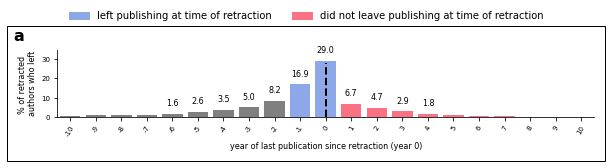

In [34]:
from matplotlib.gridspec import GridSpec
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'
import matplotlib.patches as patches

ticksize = 8
labelsize = 9

ticksize = 7
labelsize = 8

# Define a 1x1 grid
fig = plt.figure(figsize=(8.3,1.7))


gs = fig.add_gridspec(1,1)

# Discipline plot 12 bars
axesi = fig.add_subplot(gs[:, :])

create_attrition_barplot(axesi, ticksize, labelsize, attrited_color,
                        nonattrited_color, other_color)

legend_handles = [patches.Rectangle((0,0),1,1, color=attrited_color),
                  patches.Rectangle((0,0),1,1, color=nonattrited_color)]
legend_labels = ['left publishing at time of retraction', 'did not leave publishing at time of retraction']

fig.legend(handles=legend_handles, labels=legend_labels, loc='upper center', ncol=2,
          bbox_to_anchor=(0.5, 1.3), frameon=False)

rect = Rectangle((0, 0), 1, 1.1, transform=fig.transFigure, fill=False, edgecolor='black')
fig.patches.append(rect)

fig.text(rect.get_x()+0.01, rect.get_y() + rect.get_height()-0.02, 'a', fontsize=16, weight='bold',
        ha='left', va='top')

plt.tight_layout()

plt.savefig(OUTDIR+'/attrition_barplot_a_new.pdf',format='pdf', bbox_inches='tight')



# Merged plot: Author attributes (Figure b)

        MAGFieldName  Percentage
0            biology   28.965517
2          chemistry   20.041797
1           medicine   22.528736
4            physics    8.213166
3  other STEM fields   18.307210
5    non-STEM fields    1.943574


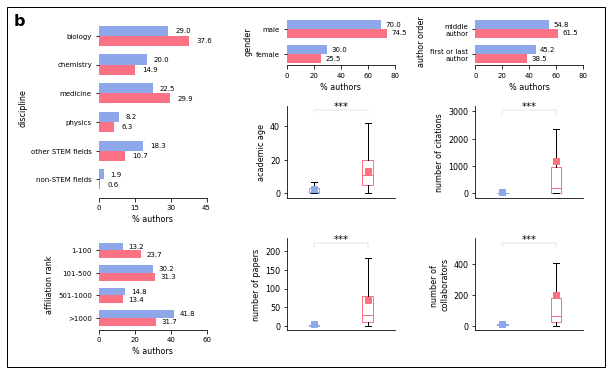

In [35]:
from matplotlib.patches import Rectangle

attrited_color = '#8EA7E9'
nonattrited_color = "#fb7285"
other_color = 'gray'

fig = plt.figure(figsize=(8.3,5))

ticksize = 7
labelsize = 8

gs = fig.add_gridspec(8,6)
# Discipline plot 12 bars
ax1 = fig.add_subplot(gs[:5, :2])
# Affiliation rank 8 bars
ax2 = fig.add_subplot(gs[5:, :2])
# Gender 4 bars
ax3 = fig.add_subplot(gs[:2, 2:4])
# Career age box 
ax4 = fig.add_subplot(gs[2:5, 2:4])
# Papers box
ax5 = fig.add_subplot(gs[5:, 2:4])
# Author order 4 bars
ax6 = fig.add_subplot(gs[:2, 4:])
# Citationx box
ax7 = fig.add_subplot(gs[2:5, 4:])
# Collab box
ax8 = fig.add_subplot(gs[5:, 4:])


barwidth = 0.35

create_discipline_plot(ax1, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)


create_affrank_plot(ax2, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)


create_gender_plot(ax3, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)


create_age_boxplot(ax4)

create_papers_boxplot(ax5)

create_authororder_plot(ax6, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

create_citations_boxplot(ax7)

create_collaborators_boxplot(ax8)


rect = Rectangle((0, 0), 1, 1, transform=fig.transFigure, fill=False, edgecolor='black')
fig.patches.append(rect)
fig.text(rect.get_x()+0.01, rect.get_y() + rect.get_height()-0.02, 'b', fontsize=16, weight='bold',
        ha='left', va='top')
plt.savefig(OUTDIR+'/merged_author_features_new.pdf',format='pdf', bbox_inches='tight')

## Merged Plot: Paper Attributes

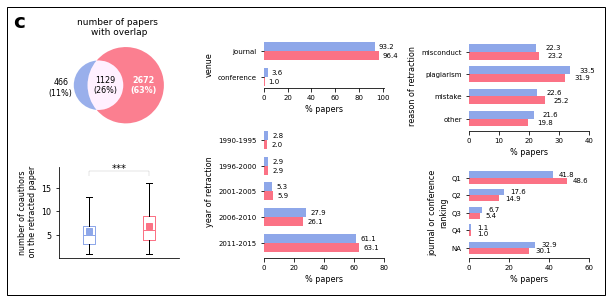

In [36]:
attrited_color = '#8EA7E9'#'#FFD93D'
nonattrited_color = "#fb7285"
other_color = 'gray'

fig = plt.figure(figsize=(8.3,4))

ticksize = 7
labelsize = 8

gs = fig.add_gridspec(6,3)
# Venn diagram
ax1 = fig.add_subplot(gs[:3, :1])
# Venue
ax2 = fig.add_subplot(gs[3:, :1])
# num coauthors
ax3 = fig.add_subplot(gs[:2, 1:2])
# reason
ax4 = fig.add_subplot(gs[2:, 1:2])
# decade
ax5 = fig.add_subplot(gs[:3, 2:])
# journal ranking
ax6 = fig.add_subplot(gs[3:, 2:])

barwidth = 0.35


create_venn(ax1, attrited_color, nonattrited_color)

create_numauthors_boxplot(ax2)

create_venue_plot(ax3, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

create_reasons_plot(ax5, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

create_retractionyear_plot(ax4, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

create_journalranking_plot(ax6, barwidth, ticksize, labelsize,
                       attrited_color, nonattrited_color, other_color)

rect = Rectangle((0, 0), 1, 1, transform=fig.transFigure, fill=False, edgecolor='black')
fig.patches.append(rect)

fig.text(rect.get_x()+0.01, rect.get_y() + rect.get_height()-0.02, 'c', fontsize=20, weight='bold',
        ha='left', va='top')


plt.tight_layout()

plt.savefig(OUTDIR+'/merged_paper_features_new.pdf',format='pdf', bbox_inches='tight')


